In [2]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
torch.__version__

'1.12.1'

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("datasets/custom_dataset/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find datasets\custom_dataset\pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [6]:
import requests
import zipfile
from pathlib import Path
data_path = Path("datasets/custom_dataset/")
image_path = data_path / "pizza_steak_sushi"

In [7]:
import os
def walk_data(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
train_dir = image_path / "train"
test_dir = image_path / "test"
walk_data(test_dir)

There are 3 directories and 0 images in 'datasets\custom_dataset\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'datasets\custom_dataset\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'datasets\custom_dataset\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'datasets\custom_dataset\pizza_steak_sushi\test\sushi'.


In [9]:
walk_data(train_dir)

There are 3 directories and 0 images in 'datasets\custom_dataset\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'datasets\custom_dataset\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'datasets\custom_dataset\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'datasets\custom_dataset\pizza_steak_sushi\train\sushi'.


Random image path: datasets\custom_dataset\pizza_steak_sushi\test\sushi\479711.jpg
Image class: sushi
Image height: 512
Image width: 512


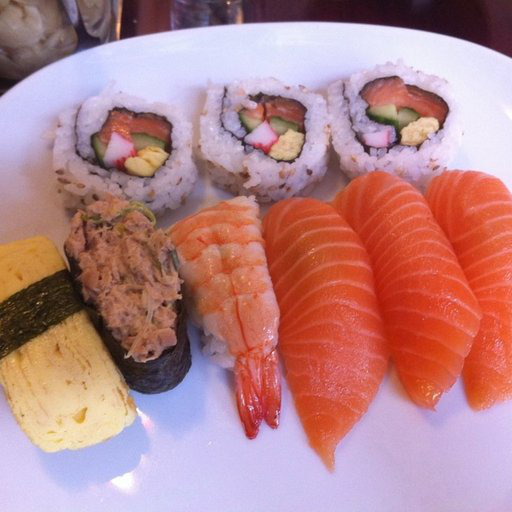

In [10]:
import random
from PIL import Image

# Set seed
random.seed(1) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

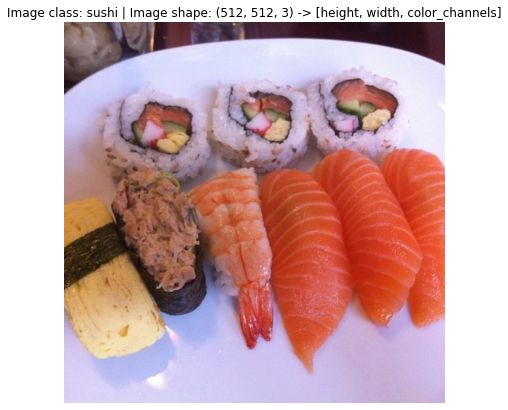

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [12]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [14]:
def plot_transformed_images(image_path, transform, n=3, seed=1):
    random.seed(1)
    random_image_paths = random.sample(image_path, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

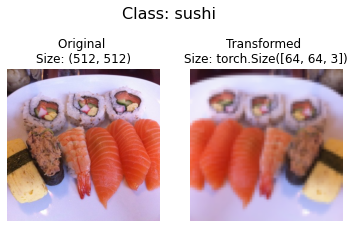

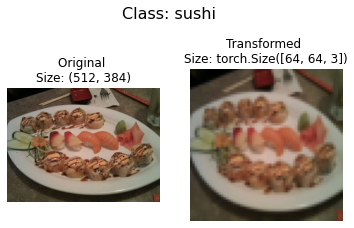

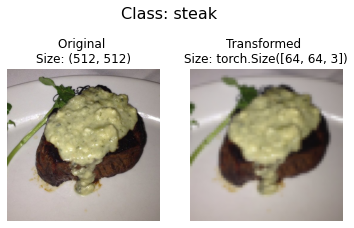

In [15]:
plot_transformed_images(image_path_list,
                       transform=data_transform,
                       n=3)

In [16]:
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: datasets\custom_dataset\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: datasets\custom_dataset\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [17]:
class_names = train_data.classes

In [18]:
class_names

['pizza', 'steak', 'sushi']

In [19]:
len(train_data)

225

In [20]:
train_data[0][0].shape #tensor data

torch.Size([3, 64, 64])

In [21]:
train_data[0][1] #this gives label

0

In [22]:
import os

print(os.cpu_count())

12


In [23]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1,
                              num_workers=1, 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ad378b89a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ad378b81f0>)

In [24]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [65]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor()
])

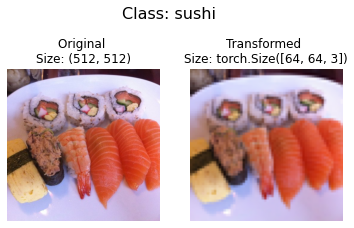

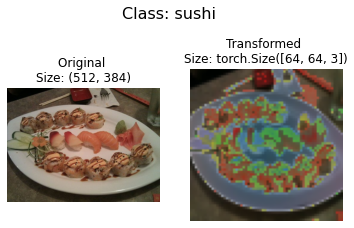

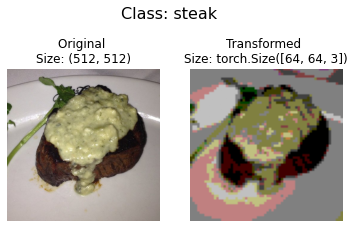

In [26]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_path=image_path_list,
    transform=train_transforms,
    n=3,
    seed=1
)

In [27]:
NUM_WORKERS = 0
BATCH_SIZE = 32
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=train_transforms,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=test_transforms)

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS, 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             num_workers=NUM_WORKERS, 
                             shuffle=False)

In [28]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ad37ab6eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ad37adb640>)

In [80]:
%%writefile model_vgg.py
from torch import nn
import torch
class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        #print(x.shape)
        return x

Writing model_vgg.py


In [30]:
x, y = next(iter(train_dataloader))
x.shape

torch.Size([32, 3, 64, 64])

In [31]:
input_shape = 3
hidden_units = 16
conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
conv_block_2 = nn.Sequential(
    nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2)
)


In [32]:
x = conv_block_1(x)
x = conv_block_2(x)
x.shape

torch.Size([32, 16, 16, 16])

In [33]:
torch.manual_seed(1)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=16,
                 output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=3, bias=True)
  )
)

In [34]:
img_batch, label_batch = next(iter(train_dataloader))

img_1, label_1 = img_batch[0].unsqueeze(dim=0), label_batch[0] # Should unsqueeze add additional dimension to img in order to fit data to model

img_1.shape

torch.Size([1, 3, 64, 64])

In [35]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_1.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_1}")

torch.Size([1, 3])
Output logits:
tensor([[-0.0291,  0.0048, -0.0429]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3311, 0.3424, 0.3265]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


In [36]:
img_batch[0].shape

torch.Size([3, 64, 64])

In [37]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 16, 64, 64]           448
│    └─ReLU: 2-2                         [1, 16, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 16, 64, 64]           2,320
│    └─ReLU: 2-4                         [1, 16, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 16, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 16, 32, 32]           2,320
│    └─ReLU: 2-7                         [1, 16, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 16, 32, 32]           2,320
│    └─ReLU: 2-9                         [1, 16, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 16, 16, 16]           --
├─Seq

In [79]:
%%writefile train_eval.py
from tqdm.auto import tqdm

def train_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        print(batch)
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss= loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Writing train_eval.py


In [61]:
torch.manual_seed(1)
torch.cuda.manual_seed(1)

EPOCHS = 5
model_0 = TinyVGG(input_shape=3,
                 hidden_units=16,
                 output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer 
start_time = timer()


model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=EPOCHS)


end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1107 | train_acc: 0.2812 | test_loss: 1.1141 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.1126 | train_acc: 0.2930 | test_loss: 1.1133 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1017 | train_acc: 0.3398 | test_loss: 1.1101 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0944 | train_acc: 0.3047 | test_loss: 1.0771 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.1014 | train_acc: 0.3242 | test_loss: 1.0613 | test_acc: 0.6146
Total training time: 6.482 seconds


In [62]:
model_0_results.keys()
from typing import Tuple, Dict, List

In [63]:
def plot_loss_curves(results: Dict[str, List[float]]):
    
    
    loss = results['train_loss']
    test_loss = results['test_loss']

    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    
    epochs = range(len(results['train_loss']))

    
    plt.figure(figsize=(15, 7))

    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

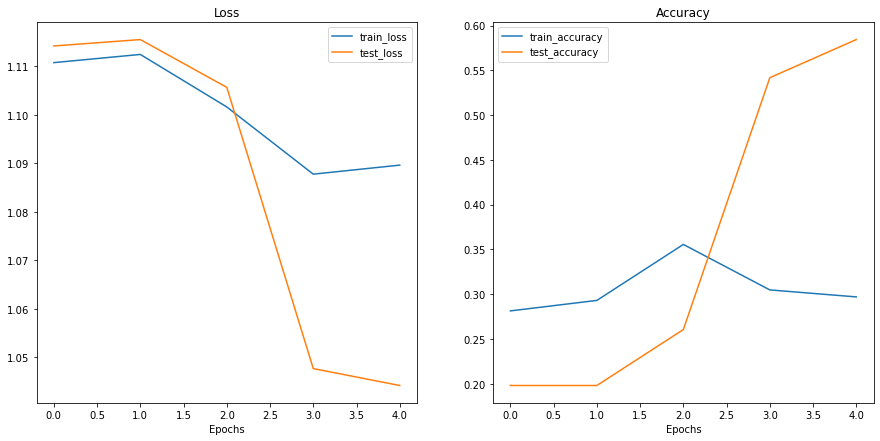

In [58]:
plot_loss_curves(model_0_results)

In [66]:
train_transforms, test_transforms

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
     ToTensor()
 ))

In [67]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)


In [81]:
%%writefile prep_data.py

import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def create_dataloaders(train_dir, test_dir, transform: transoforms.Compose, num_workers:int):    
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    train_dataloader = DataLoader(train_data_augmented,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           num_workers=num_workers,
                                           pin_memory=True)
    class_names = train_data.classes
    test_dataloader = DataLoader(test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=num_workers,
                                pin_memory=True)
    
    return train_dataloader, test_dataloader, class_names

Writing prep_data.py


In [74]:
torch.manual_seed(1)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=8,
                 output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=3, bias=True)
  )
)

In [75]:
torch.manual_seed(1)
torch.cuda.manual_seed(1)

EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=EPOCHS)
end_time = timer()
print(f"Total training time is {end_time - start_time} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
Epoch: 1 | train_loss: 1.1256 | train_acc: 0.2734 | test_loss: 1.1001 | test_acc: 0.2604
0
1
2
3
4
5
6
7
Epoch: 2 | train_loss: 1.1193 | train_acc: 0.3398 | test_loss: 1.1525 | test_acc: 0.1979
0
1
2
3
4
5
6
7
Epoch: 3 | train_loss: 1.1110 | train_acc: 0.2930 | test_loss: 1.1049 | test_acc: 0.1979
0
1
2
3
4
5
6
7
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.0992 | test_acc: 0.2282
0
1
2
3
4
5
6
7
Epoch: 5 | train_loss: 1.0974 | train_acc: 0.4375 | test_loss: 1.1007 | test_acc: 0.2812
Total training time is 18.853178899999875 seconds


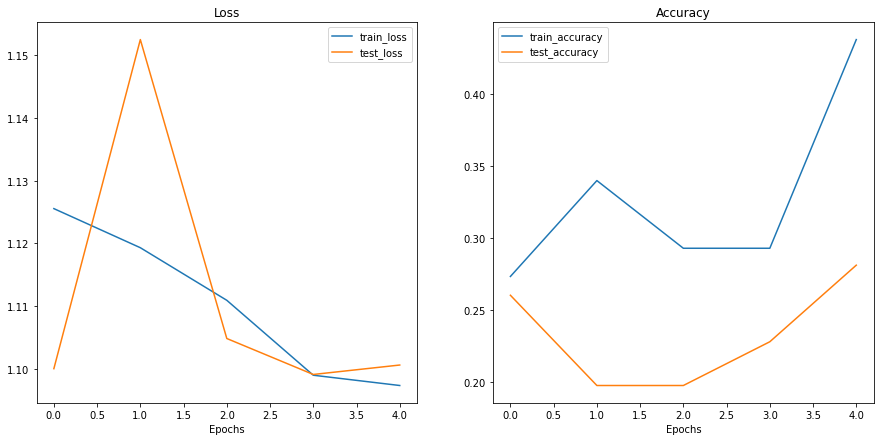

In [76]:
plot_loss_curves(model_1_results)

# Using pretrained models to predict Food Vision

In [77]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])